In [1]:
import requests, zipfile
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
auto = pd.read_csv("./automobile.csv")
auto = auto.replace("?", np.nan).dropna()

In [3]:
numberList = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                'horsepower','peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [4]:
for column in numberList:
    auto[column] = pd.to_numeric(auto[column], errors='coerce')

In [5]:
auto = auto[numberList]

In [6]:
X = auto.drop('price', axis=1)
y = auto['price']

In [7]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
from evaluation import Stepwise

In [10]:
sw = Stepwise(X_train, y_train)

In [11]:
sw.run()

In [14]:
sw.mse(X_test, y_test)

In [15]:
np.array(sw.errors).argmin()

24

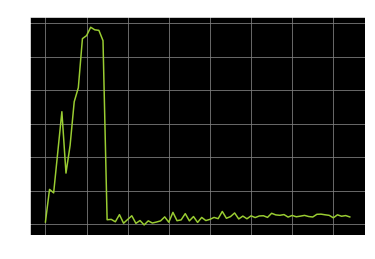

In [17]:
plt.plot(sw.errors)

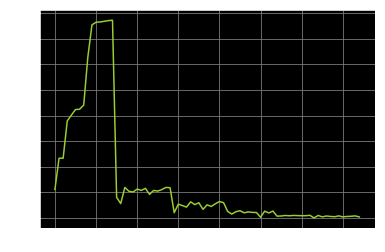

In [18]:
plt.plot(sw.evals)